Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0

C:\Users\HP Elitbook\AppData\Local\Temp\ipykernel_13736\739462264.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\HP Elitbook\AppData\Local\Temp\ipykernel_13736\739462264.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

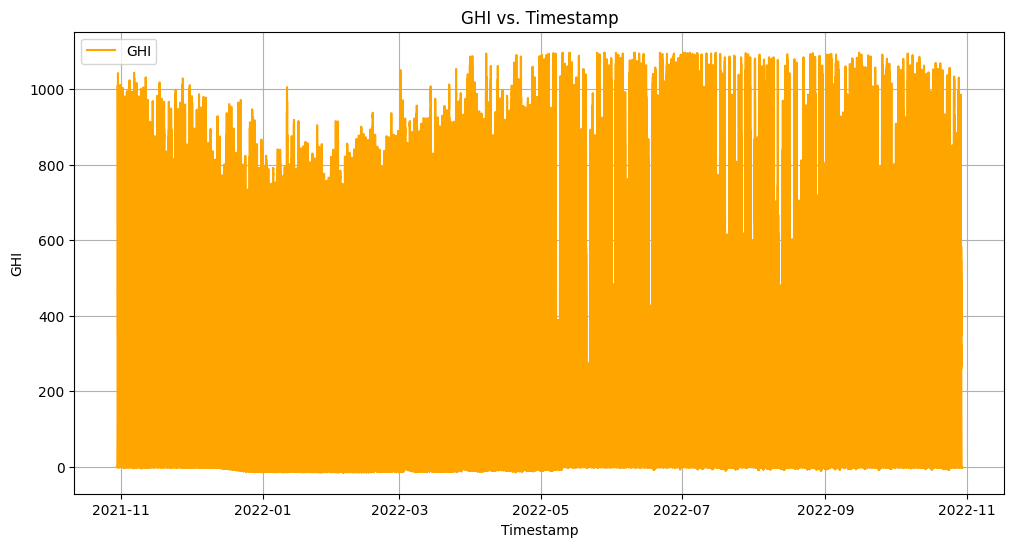

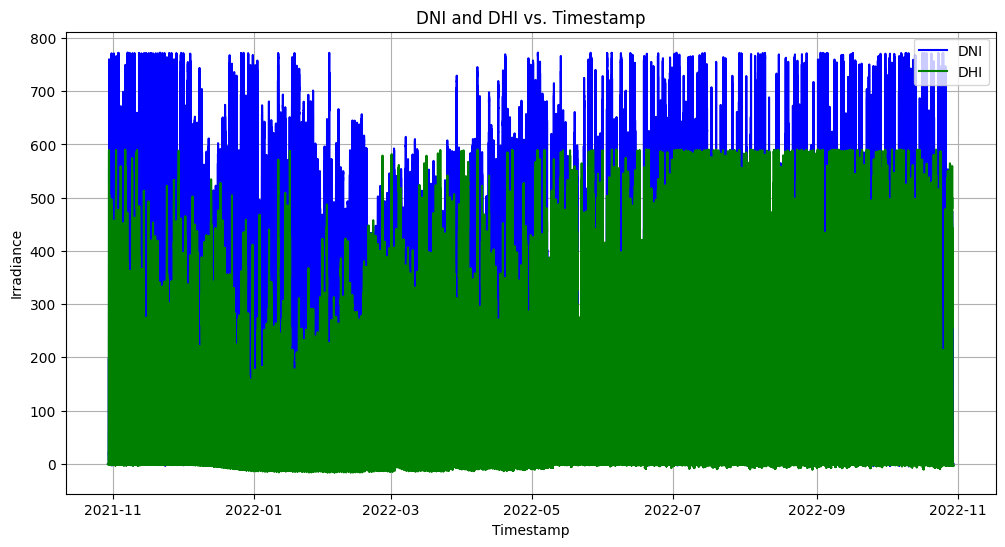

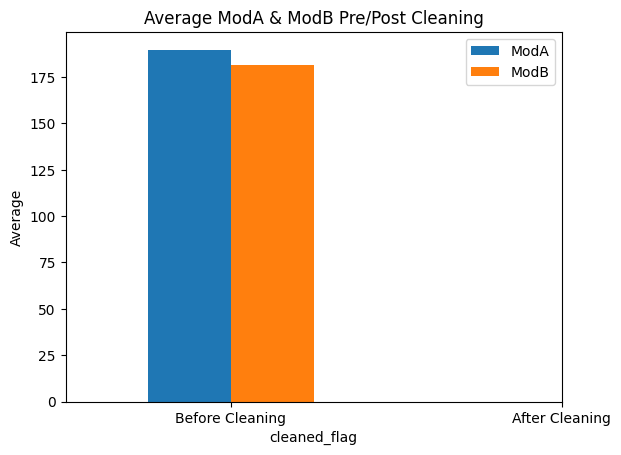

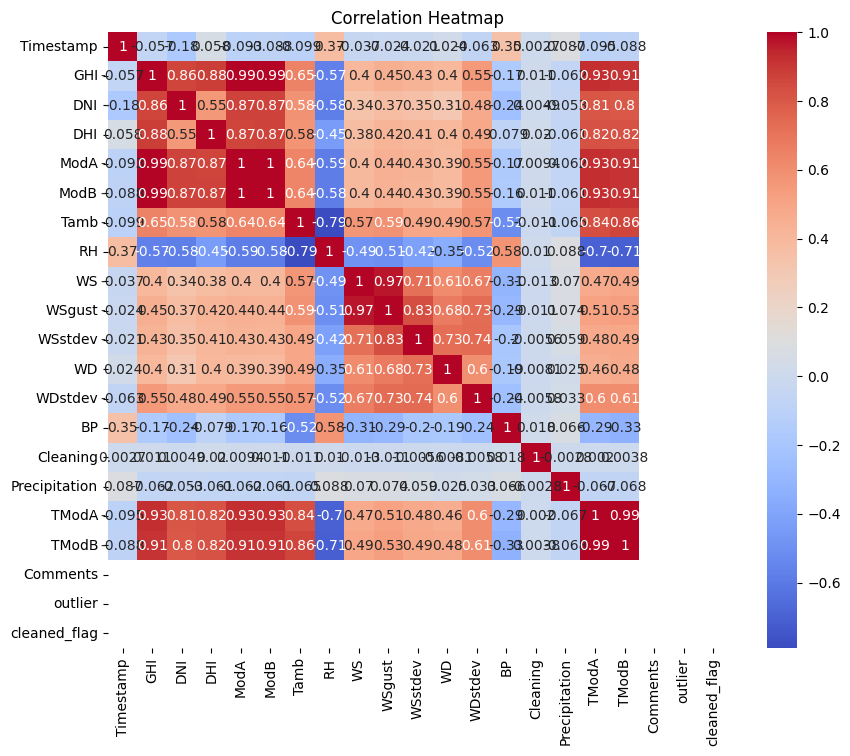

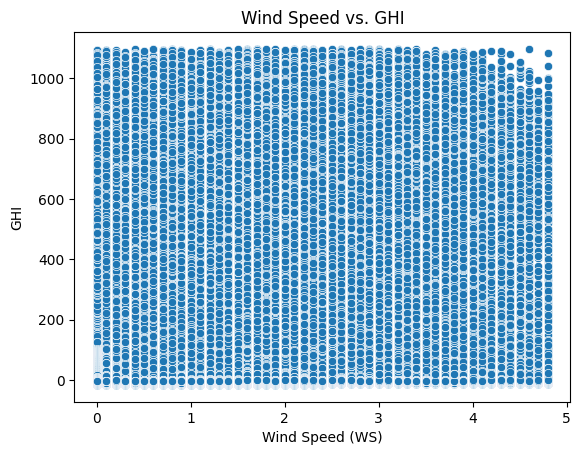

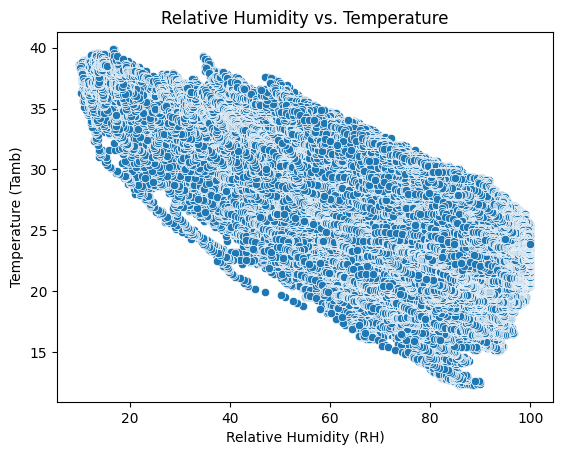

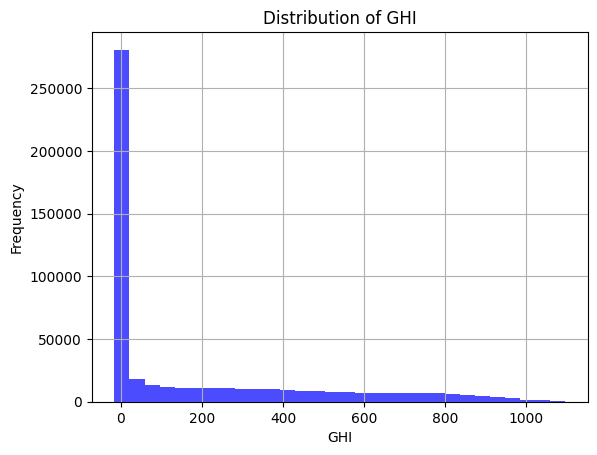

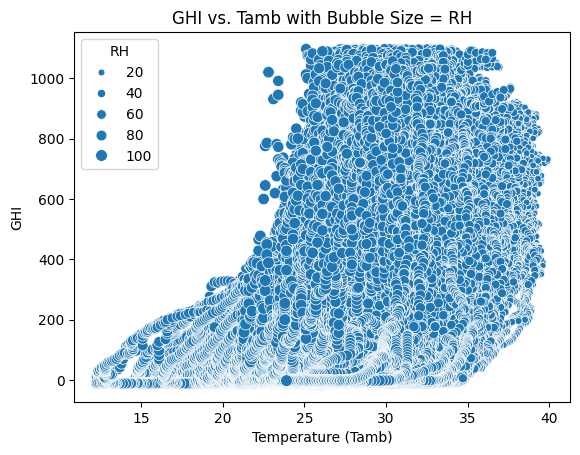

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('../data/sierraleone-bumbuna.csv')  # Adjust the path as needed

# Step 1: Summary Statistics & Missing-Value Report
print("Summary Statistics:")
print(df.describe())

missing_values = df.isna().sum()
print("\nMissing Values:\n", missing_values)

# List columns with >5% nulls
null_columns = df.columns[missing_values / len(df) > 0.05]
print("\nColumns with >5% Nulls:", null_columns)

# Step 2: Outlier Detection & Basic Cleaning
# Compute Z-scores for specified columns
z_scores = stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']], nan_policy='omit')
df['outlier'] = (abs(z_scores) > 3).any(axis=1)

# Impute missing values with median for key columns
for column in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']:
    df[column].fillna(df[column].median(), inplace=True)

# Drop outlier rows
df = df[~df['outlier']]

# Step 3: Export Cleaned DataFrame
df.to_csv('../data/sierraleone_clean.csv', index=False)  # Adjust the path as needed

# Step 4: Time Series Analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot GHI over time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI', color='orange')
plt.title('GHI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.legend()
plt.grid()
plt.show()

# Additional plots for DNI and DHI
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['DNI'], label='DNI', color='blue')
plt.plot(df['Timestamp'], df['DHI'], label='DHI', color='green')
plt.title('DNI and DHI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance')
plt.legend()
plt.grid()
plt.show()

# Step 5: Cleaning Impact Analysis
df['cleaned_flag'] = df['outlier'] == False
mean_values = df.groupby('cleaned_flag')[['ModA', 'ModB']].mean()  # Use double brackets for list
mean_values.plot(kind='bar')
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.ylabel('Average')
plt.xticks([0, 1], ['Before Cleaning', 'After Cleaning'], rotation=0)
plt.show()

# Step 6: Correlation & Relationship Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots for WS vs GHI and RH vs Tamb
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('Wind Speed vs. GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Temperature (Tamb)')
plt.show()

# Step 7: Wind & Distribution Analysis
plt.hist(df['GHI'], bins=30, alpha=0.7, color='blue')
plt.title('Distribution of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Step 8: Temperature Analysis
sns.scatterplot(x='Tamb', y='GHI', size='RH', data=df)
plt.title('GHI vs. Tamb with Bubble Size = RH')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('GHI')
plt.show()